- rimozione outlier
- rimozione errori (-1 su delta) --> NaN
- controllare che non ci siano righe con valori completmente nulli
- rimozione cobbled, gravel perchè sono tutti true e false
- rimuovere i ciclisti dal dataframe dei ciclisti che non hanno partecipato a gare ???
- rimozione delle feature correlate 
- drop temperatura

Columns containing null values in the cyclist dataset:
- birth_year
- weight
- height


Outliers in cyclist dataset:
- weight
- height

Columns containing null values in the races dataset:
- points
- uci_points
- climb_total
- profile
- cyclist age
- cyclist_team



Outliers in races dataset:
- points
- uci_points
- length
- climb_total
- start_list quality
- race_year
- cyclist_age
- delta







Duplicates in races dataset:
- cyclists
- 

Inconsistencies:
- cyclist_age
- delta

# **Data Cleaning**

## **Cyclists Dataset**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
cyclists_df = pd.read_csv('../dataset/cyclists.csv')

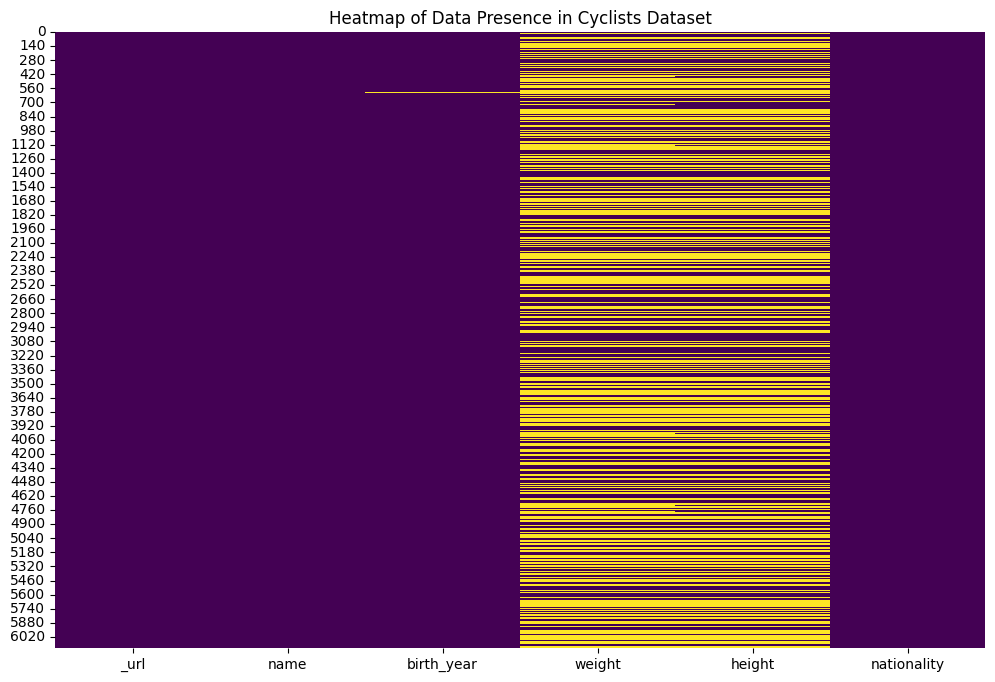

In [22]:
# ---- heatmap of the presence of data in the cyclists_df dataset ----

plt.figure(figsize=(12, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

Replace outlier values with NULL

In [27]:
def replace_outliers_with_nan(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

# List of columns for which we want to replace outliers with NaN
columns_to_check = ['birth_year', 'weight', 'height', 'nationality', 'name', '_url']

for column in columns_to_check:
    replace_outliers_with_nan(cyclists_df, column)

print("Outliers replaced with NaN in the specified columns.")

Outliers replaced with NaN in the specified columns.


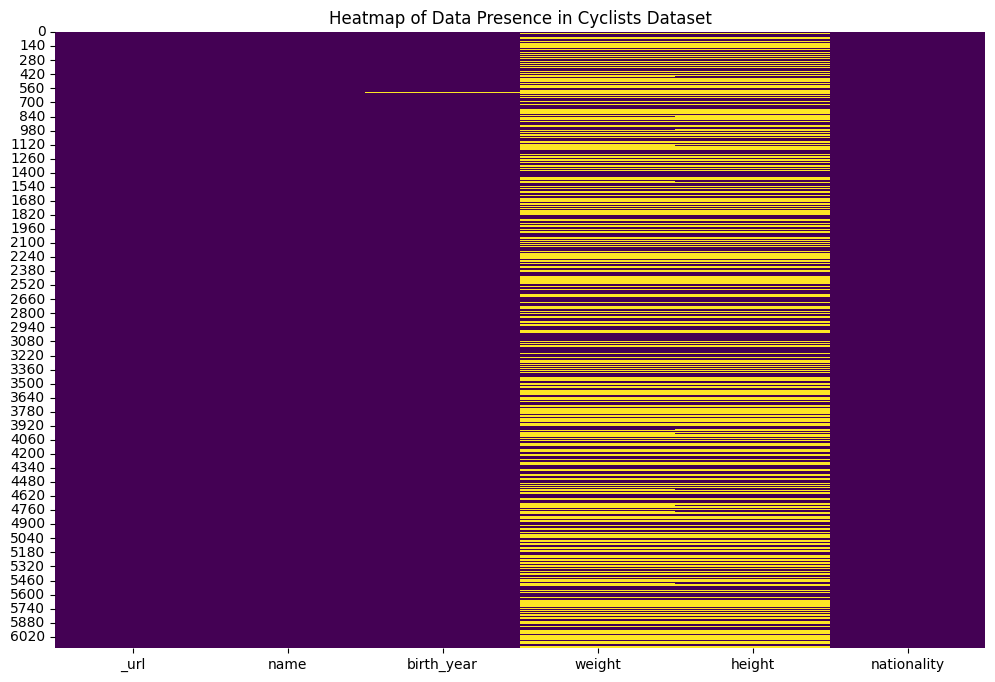

In [28]:
# Visualize a heatmap of the presence of data in the cyclists_df dataset
plt.figure(figsize=(12, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

### **0BS:** 
Since height and weight are correlated perhaps before discarding (so many nulls) we could try putting missing values of one where you have the other and see how many null values continue to remain 

Deletion of all rows with at least n null parameters. 

In [8]:
x = 3 # Minimum number of non-NA values required to keep the row

initial_row_count = cyclists_df.shape[0]
# Drop rows with at least 'x' null values
cyclists_df= cyclists_df.dropna(thresh=cyclists_df.shape[1] - x + 1)
# Calculate the number of dropped rows
dropped_rows = initial_row_count - cyclists_df.shape[0]
print(f"Number of dropped rows: {dropped_rows}")


Number of dropped rows: 13


Deletion of all columns with at least n% null parameters. 

In [51]:
n = 50  # Percentage threshold for null values

# Calculate the threshold for the number of null values
threshold = len(cyclists_df) * (n / 100)

# Drop columns with at least 'n%' null values
cyclists_df = cyclists_df.dropna(axis=1, thresh=threshold)

print(f"Remaining columns after dropping columns with at least {n}% null values:")
print(cyclists_df.columns)

Remaining columns after dropping columns with at least 50% null values:
Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'date', 'position', 'cyclist', 'cyclist_age',
       'is_tarmac', 'is_cobbled', 'is_gravel', 'cyclist_team', 'delta'],
      dtype='object')


## **Races Dataset**

In [35]:
races_df = pd.read_csv('../dataset/races.csv')

'null' is put in place of any negative value for delta

In [36]:
races_df['delta'] = races_df['delta'].apply(lambda x: np.nan if x < 0 else x)

Drop columns 'is_cobred' and 'is_clmbed' as they are all false

In [37]:
races_df = races_df.drop(columns=['is_gravel', 'is_cobbled'])
print(f"Remaining columns after dropping:")
print(races_df.columns)

Remaining columns after dropping:
Index(['_url', 'name', 'points', 'uci_points', 'length', 'climb_total',
       'profile', 'startlist_quality', 'average_temperature', 'date',
       'position', 'cyclist', 'cyclist_age', 'is_tarmac', 'cyclist_team',
       'delta'],
      dtype='object')


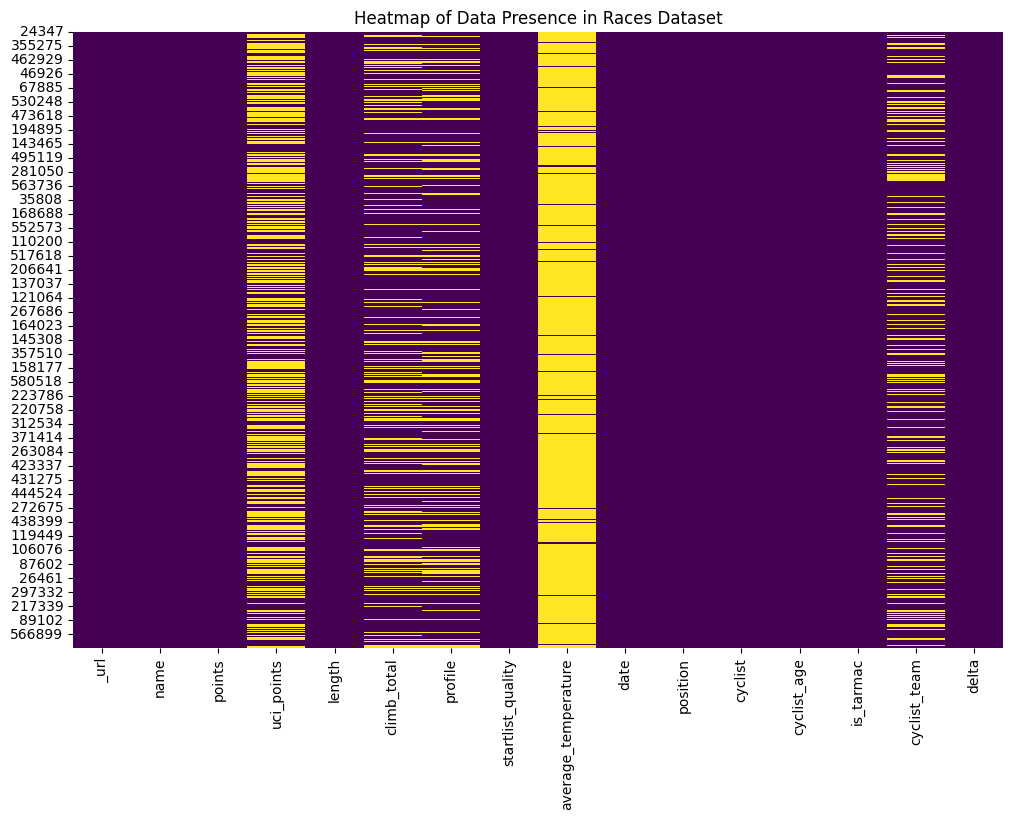

In [38]:
# Visualize a heatmap of the presence of data in the races_df dataset
plt.figure(figsize=(12, 8))

# Sample a subset of the data to avoid memory issues
sampled_races_df = races_df.sample(frac=0.1, random_state=1)

sns.heatmap(sampled_races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Races Dataset')
plt.show()

Replace outlier values with NULL

In [39]:
def replace_outliers_with_nan(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

# List of columns for which we want to replace outliers with NaN
columns_to_check = ['points', 'length', 'climb_total', 'profile', 'startlist_quality', 'cyclist_age', 'delta']

for column in columns_to_check:
    replace_outliers_with_nan(races_df, column)

print("Outliers replaced with NaN in the specified columns.")

Outliers replaced with NaN in the specified columns.


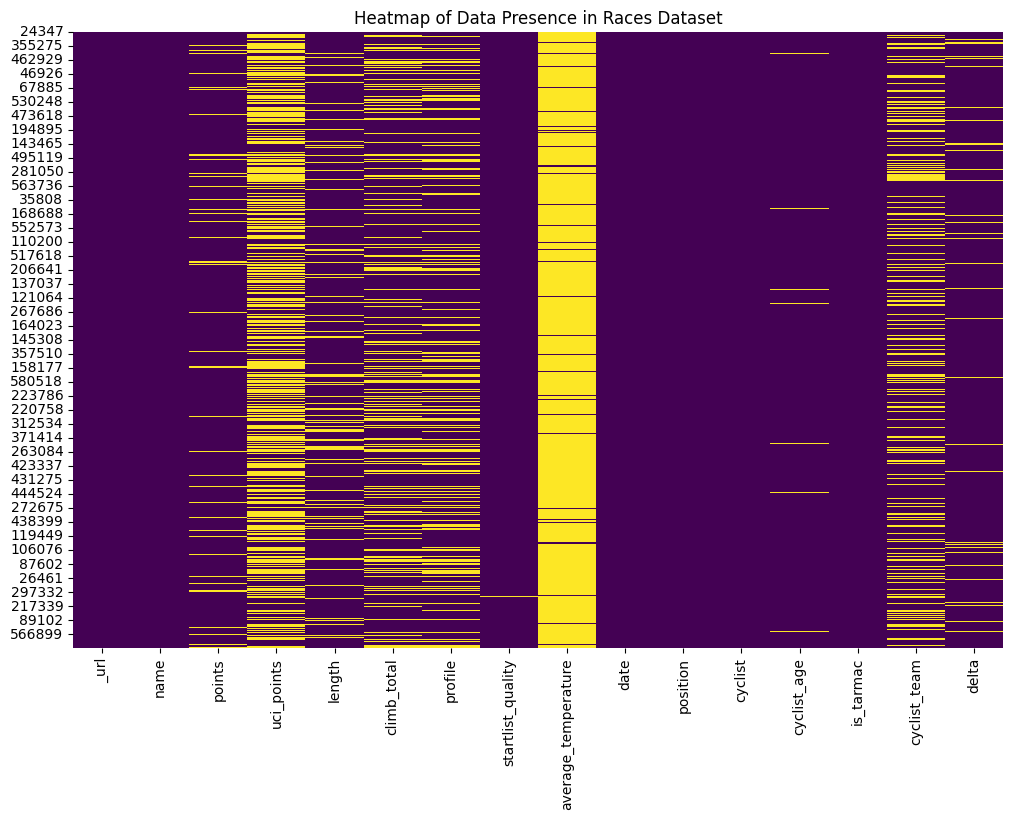

In [40]:
# Visualize a heatmap of the presence of data in the races_df dataset
plt.figure(figsize=(12, 8))

# Sample a subset of the data to avoid memory issues
sampled_races_df = races_df.sample(frac=0.1, random_state=1)

sns.heatmap(sampled_races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Races Dataset')
plt.show()

### **0BS:** 
Since prfile and climb_total are correlated perhaps before discarding (so many nulls) we could try putting missing values of one where you have the other and see how many null values continue to remain 

### **OBS:**
We should put null to all invalid delta values i.e. smaller than above with same url (cyclists arrived earlier with higher delta is impossible)

### **OBS:**
we should check the question of deltas and dates, if indeed all deltas can be derived from deltas (which seem to represent the duration of the race) then we can discard deltas. (deltas are the differences in the dates) 

### **OBS:**
There are many null value for uci_points but we know that uci_point and points (wich doesn't have many null value) are correlated so I think we can discard uci_point

Deletion of all rows with at least n null parameters. 

In [8]:
x = 5 # Minimum number of non-NA values required to keep the row

initial_row_count = races_df.shape[0]
# Drop rows with at least 'x' null values
races_df = races_df.dropna(thresh=races_df.shape[1] - x + 1)
# Calculate the number of dropped rows
dropped_rows = initial_row_count - races_df.shape[0]
print(f"Number of dropped rows: {dropped_rows}")


Number of dropped rows: 47974


Deletion of all columns with at least n% null parameters. 

In [9]:
n = 50  # Percentage threshold for null values

# Calculate the threshold for the number of null values
threshold = len(races_df) * (n / 100)

# Drop columns with at least 'n%' null values
races_df = races_df.dropna(axis=1, thresh=threshold)

print(f"Remaining columns after dropping columns with at least {n}% null values:")
print(races_df.columns)

Remaining columns after dropping columns with at least 50% null values:
Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'date', 'position', 'cyclist', 'cyclist_age',
       'is_tarmac', 'is_cobbled', 'is_gravel', 'cyclist_team', 'delta'],
      dtype='object')
